In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os 
from pylab import *

**Limites da região**\
Benguela: Latitude: 39°S - 17°S; Longitude: 8°E to 31°E\
Atl. Tropical: Latitude: 20°S - 20°N; Longitude: 90°W to 15°E

## Inicio do tratamento dos dados das MHW (Benguela)

In [2]:
benguela=xr.open_dataset('..../SST_MHW_Benguela_Agulhas.nc', chunks={'time':10})

In [3]:
time=benguela.time
newtime=[datetime.datetime.fromordinal(int(time[i].data)) for i in range(len(time))] # criando o intervalo de tempo
benguela=benguela.assign(time=newtime)

del time

In [4]:
benguela=benguela.sel(time=slice('1990','2020'))

In [5]:
benguela=benguela.where(benguela>-1000)

In [6]:
mhw_category = benguela.mhw_category.where(benguela.mhw_category>0)
sst_anom=benguela.sst_anom #sst anomalia
sst=benguela.sst      #sst 
seas=benguela.seas    #climatologia
thresh=benguela.thresh #percentil 90
sst_anom_event=benguela.sst_anom.where(benguela.mhw_category>0)
sst_acum=sst_anom_event.where(sst_anom_event>0)

##Transformando a variável "mhw_category" para a contagem.
mhw_category_new = mhw_category*0
mhw_category_new = mhw_category_new+1

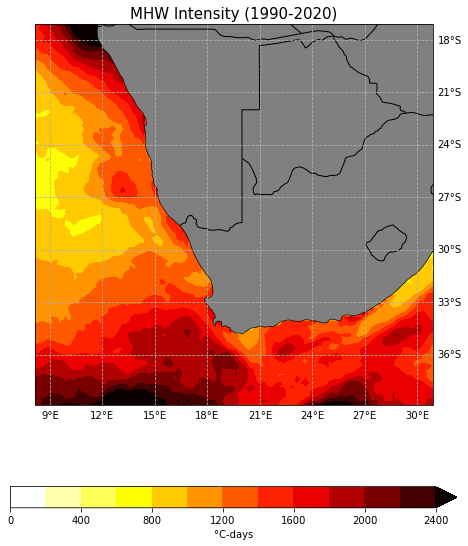

In [8]:
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.PlateCarree())
)
### somatório dos valores positivos 
sst_acum.sum(dim='time').plot.contourf(
    ax=axis,
    transform=ccrs.PlateCarree(),  
    cmap='hot_r',
    cbar_kwargs={"orientation": "horizontal", "label":"°C-days","shrink": 0.8},
    robust=True, levels=15
)
# plt.text( 349, -6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
# plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
axis.coastlines() 
axis.add_feature(land, linewidth=0.25)
axis.add_feature(cfeature.BORDERS, linewidth=1)
gl=axis.gridlines(draw_labels=True,linestyle='--')
gl.top_labels=False
gl.right_labels
gl.left_labels=False
gl.bottom_labels
plt.title('MHW Intensity (1990-2020)', size=15)
fig.set_size_inches(10,10)
# fig.savefig('mhw_intensity.jpeg')

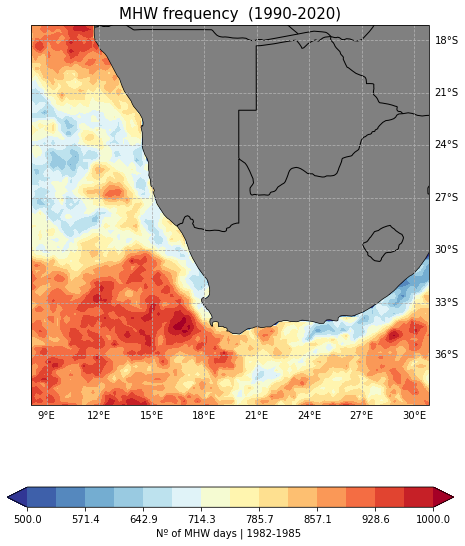

In [24]:
## gráfico mostrando a quantidade de dias com MHW
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.PlateCarree())
)

mhw_category_new.sum(dim='time').plot.contourf(vmin=500,vmax=1000,
    ax=axis,
    transform=ccrs.PlateCarree(), 
    cmap='RdYlBu_r',
    cbar_kwargs={"orientation": "horizontal", "label":"Nº of MHW days | 1982-1985 ","shrink": 0.8},
    robust=True,levels=15
)
# plt.text( 349, - 6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
# plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
axis.coastlines() 
axis.add_feature(land, linewidth=0.25)
axis.add_feature(cfeature.BORDERS, linewidth=1)
gl=axis.gridlines(draw_labels=True,linestyle='--')
gl.top_labels=False
gl.right_labels
gl.left_labels=False
gl.bottom_labels
plt.title('MHW frequency  (1990-2020)', size=15)
fig.set_size_inches(10,10)
# fig.savefig('MHW_frequency.jpeg')

### Selecionando a região para trabalhar nos gráficos

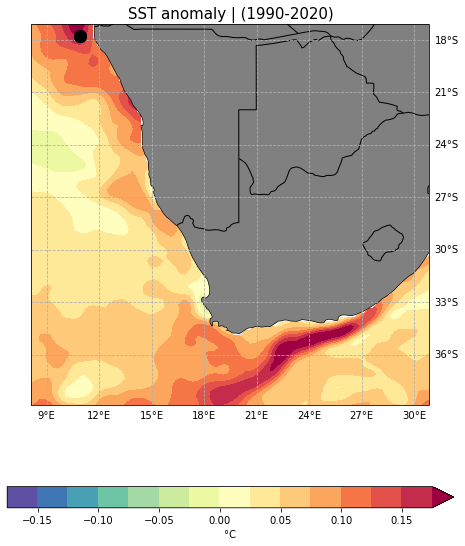

In [25]:
## anomalia media de toda a série temporal
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.PlateCarree())
)

sst_anom.mean(dim='time').plot.contourf(
    ax=axis,
    transform=ccrs.PlateCarree(), 
    cmap='Spectral_r',
    cbar_kwargs={"orientation": "horizontal", "label":"°C","shrink": 0.8},
    robust=True,levels=15
)
# plt.text( 349, - 6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
# plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
# plt.plot([9,11.7],[-17.8,-17.8],color='k', lw=2, ls='--')
plt.plot([10.9,10.9],[-17.8,-17.8],color='k',  marker='o',lw=6, linestyle='dashed',markersize=12)
axis.coastlines() 
axis.add_feature(land, linewidth=0.25)
axis.add_feature(cfeature.BORDERS, linewidth=1)
gl=axis.gridlines(draw_labels=True,linestyle='--')
gl.top_labels=False
gl.right_labels
gl.left_labels=False
gl.bottom_labels
plt.title('SST anomaly | (1990-2020)', size=15)
fig.set_size_inches(10,10)
# fig.savefig('SST_anomaly.jpeg')

### Gráfico de latitude por SST-CLIMATOLOGIA- PERCENTIL 90

In [12]:
lat18=benguela.sel(lat=[-17],lon=[10.9], method='nearest')
lat18_res=lat18.resample(time='11d').mean()

In [13]:
from pylab import *

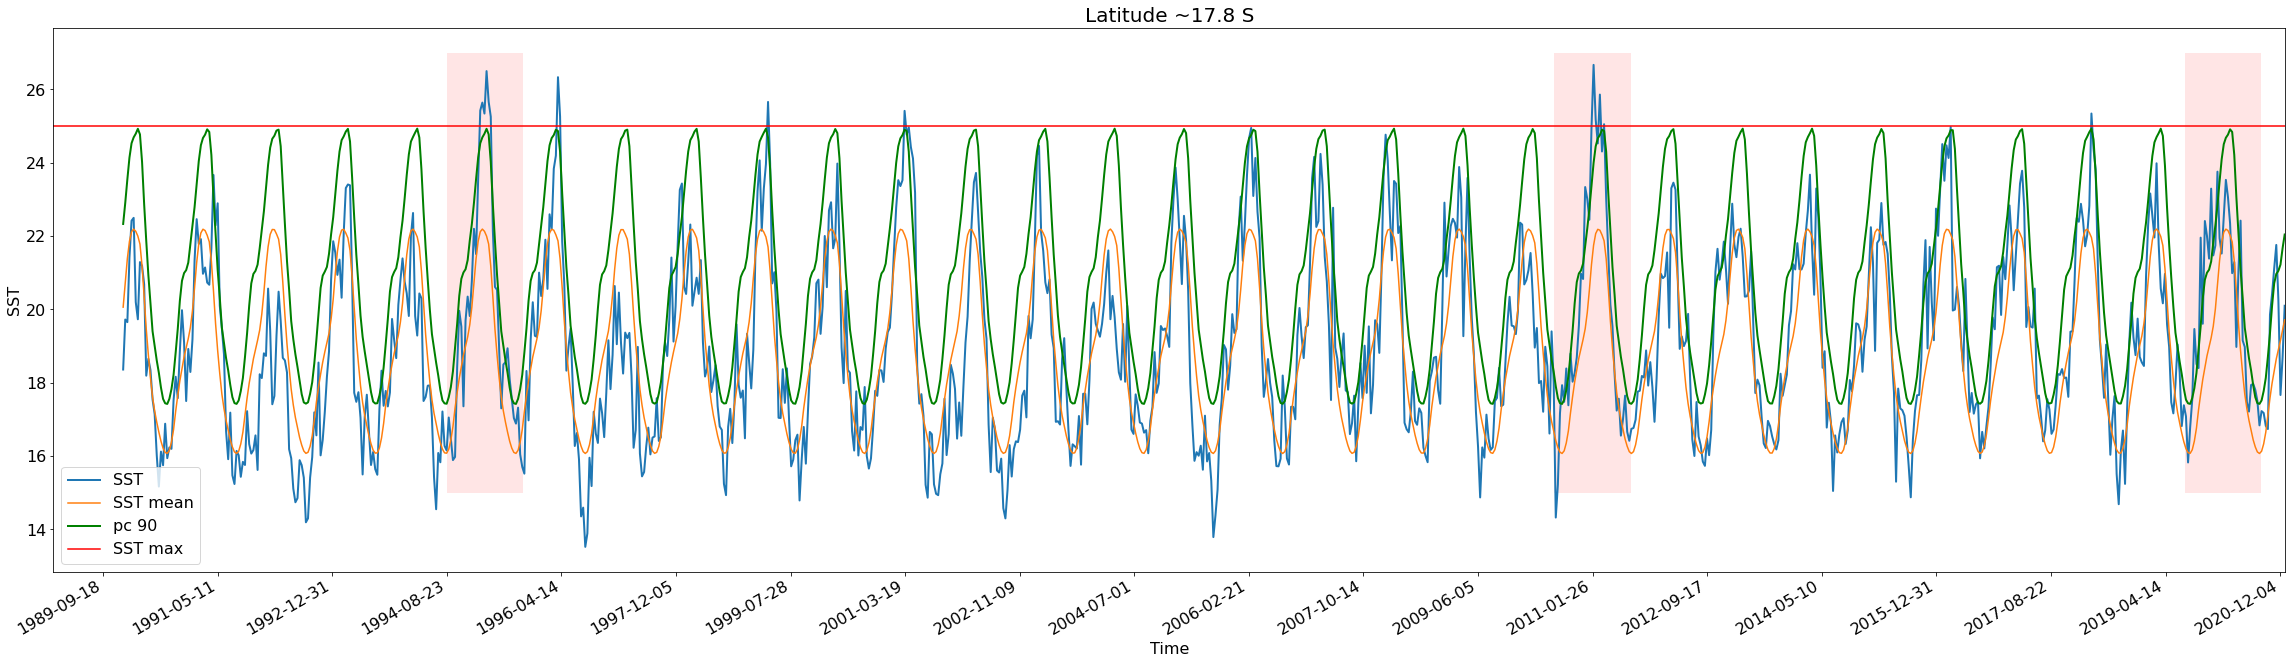

In [38]:
fig, ax=plt.subplots(figsize=(40,10))

a=lat18_res.sst.mean(dim='lon').plot(lw=2)
b=lat18_res.seas.mean(dim='lon').plot()
c=lat18_res.thresh.mean(dim='lon').plot(lw=2, color='g')
d=plt.axhline(y = 25, color = 'r', linestyle = '-')
plt.legend(loc=3,labels=('SST','SST mean','pc 90','SST max'), prop={'size': 16})
plt.title('Latitude ~17.8 S', size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylabel('SST', size=16)
plt.xlabel('Time', size=16)
plt.xlim('1989','2021')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

fill([9000,9000,9400,9400], [15,27,27,15], 'r', alpha=0.1)
fill([14800,14800,15200,15200], [15,27,27,15], 'r', alpha=0.1)
fill([18100,18100,18500,18500], [15,27,27,15], 'r', alpha=0.1)

plt.savefig('lat17_allseries.jpeg')

In [15]:
lat18_2019=benguela.sel(lat=[-17],lon=[10.9], method='nearest').sel(time='2019')
lat18_2019=lat18_2019.resample(time='1d').mean()

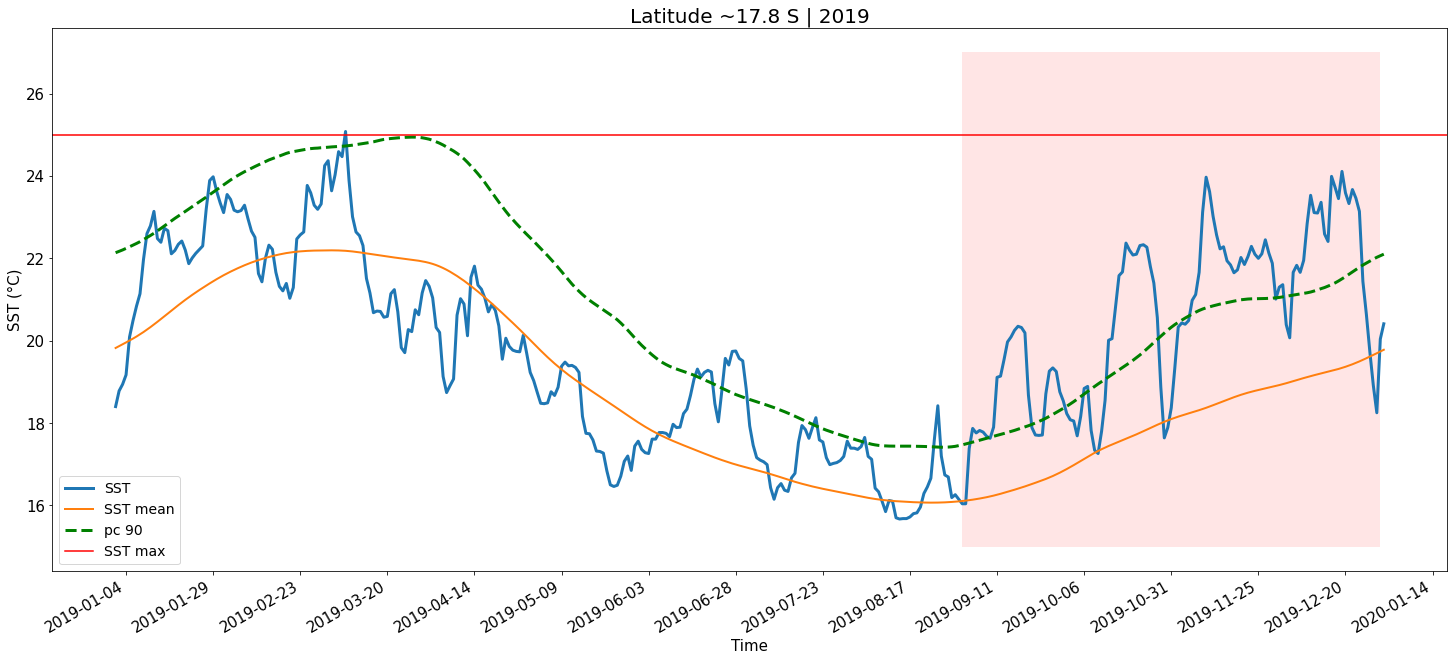

In [40]:
fig, ax=plt.subplots(figsize=(25,10))

lat18_2019.sst.mean(dim='lon').plot(lw=3)
lat18_2019.seas.mean(dim='lon').plot(lw=2)
lat18_2019.thresh.mean(dim='lon').plot(lw=3,ls='--', color='g')
h=plt.axhline(y = 25, color = 'r', linestyle = '-')
plt.legend(loc=3,labels=('SST','SST mean','pc 90','SST max'), prop={'size': 14})
plt.title('Latitude ~17.8 S | 2019', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('SST (°C)', size=15)
plt.xlabel('Time', size=15)
# plt.xlim('1989','2021')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

# fill([9000,9000,9400,9400], [15,27,27,15], 'r', alpha=0.1)
# fill([14800,14800,15200,15200], [15,27,27,15], 'r', alpha=0.1)
fill([18140,18140,18260,18260], [15,27,27,15], 'r', alpha=0.1)

# plt.savefig('lat17_2019.jpeg')

### Início da MHW de 2019 ocorre no começo de setembro
#### SST max = 25.08 °C
#### SST anom max = 5.6
#### MHW Category = 2

In [17]:
lat18_2011=benguela.sel(lat=[-17],lon=[10.9], method='nearest').sel(time='2011')
lat18_2011=lat18_2011.resample(time='1d').mean()

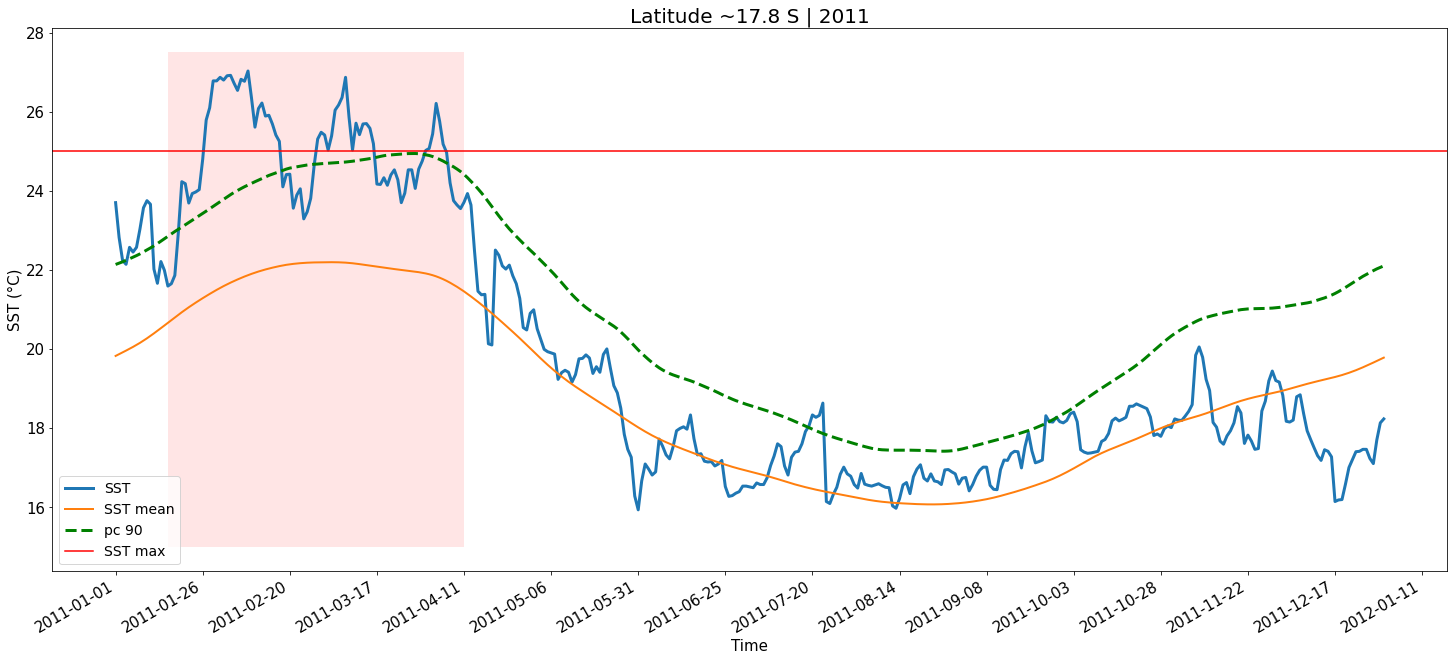

In [42]:
fig, ax=plt.subplots(figsize=(25,10))

lat18_2011.sst.mean(dim='lon').plot(lw=3)
lat18_2011.seas.mean(dim='lon').plot(lw=2)
lat18_2011.thresh.mean(dim='lon').plot(lw=3,ls='--', color='g')
h=plt.axhline(y = 25, color = 'r', linestyle = '-')
plt.legend(loc=3,labels=('SST','SST mean','pc 90','SST max'), prop={'size': 14})
plt.title('Latitude ~17.8 S | 2011', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('SST (°C)', size=15)
plt.xlabel('Time', size=15)
# plt.xlim('1989','2021')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

# fill([9000,9000,9400,9400], [15,27,27,15], 'r', alpha=0.1)
fill([14990,14990,15075,15075], [15,27.5,27.5,15], 'r', alpha=0.1)
# fill([18145,18145,18260,18260], [15,27,27,15], 'r', alpha=0.1)

plt.savefig('lat17_2011.jpeg')

### Início da MHW de 2011 ocorre em meados de janeiro
#### SST Max = 27.02 °C;
#### SST Anom = 5.3 °C;
#### MHW category = 2

In [19]:
lat18_1995=benguela.sel(lat=[-17],lon=[10.9], method='nearest').sel(time='1995')
lat18_1995=lat18_1995.resample(time='1d').mean()

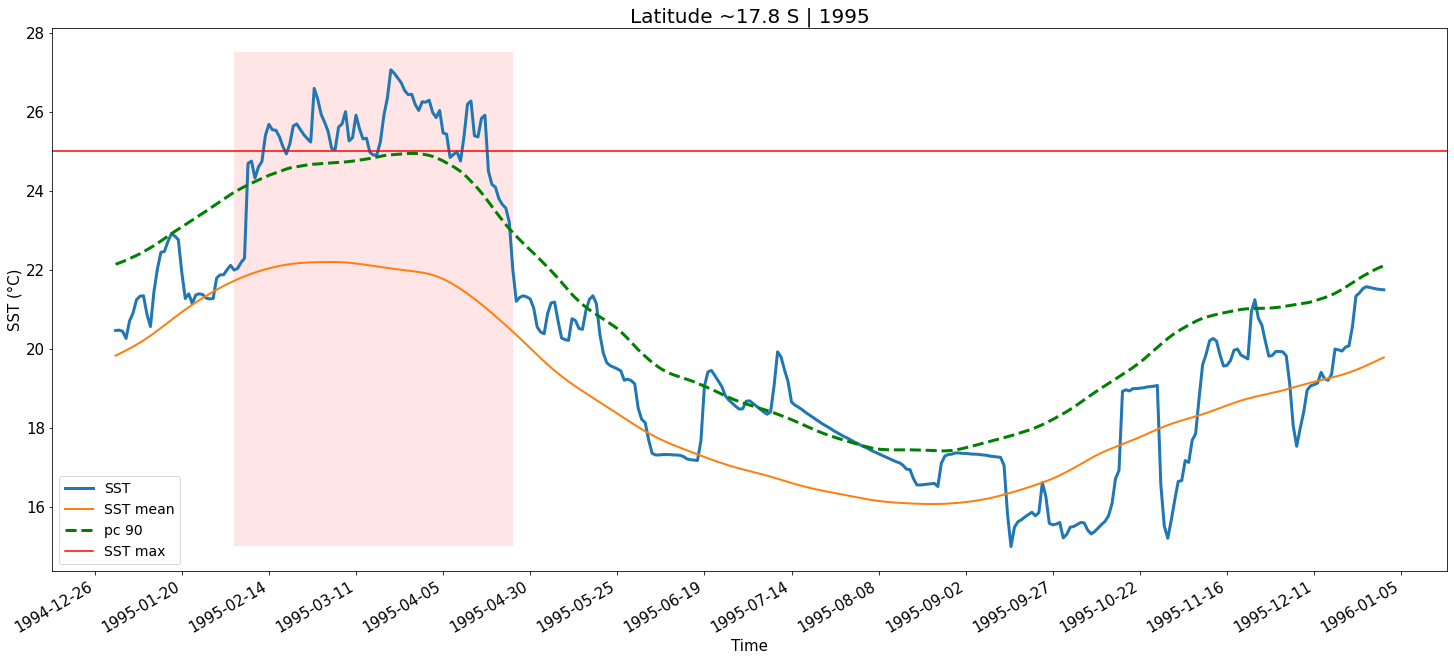

In [43]:
fig, ax=plt.subplots(figsize=(25,10))

lat18_1995.sst.mean(dim='lon').plot(lw=3)
lat18_1995.seas.mean(dim='lon').plot(lw=2)
lat18_1995.thresh.mean(dim='lon').plot(lw=3,ls='--', color='g')
h=plt.axhline(y = 25, color = 'r', linestyle = '-')
plt.legend(loc=3,labels=('SST','SST mean','pc 90','SST max'), prop={'size': 14})
plt.title('Latitude ~17.8 S | 1995', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('SST (°C)', size=15)
plt.xlabel('Time', size=15)
# plt.xlim('1989','2021')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

fill([9165,9165,9245,9245], [15,27.5,27.5,15], 'r', alpha=0.1)
# fill([14990,14990,15080,15080], [15,27.5,27.5,15], 'r', alpha=0.1)
# fill([18145,18145,18260,18260], [15,27,27,15], 'r', alpha=0.1)

plt.savefig('lat17_1995.jpeg')

### Começo da MHW de 1995 no começo de fevereiro, com fim em meado de abril
#### SST max = 27.05°C
#### SST anom max = 5.02 °C
#### MHW Category = 1

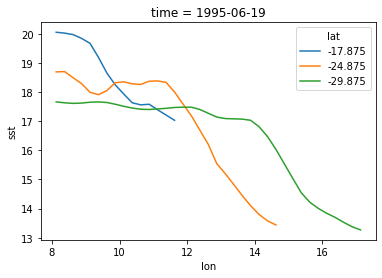

In [32]:
benguela.sst.isel(time=1995).sel(lat=[-18, -25, -30], method="nearest").plot(
    x="lon", hue="lat")